In [1]:
' Downloads and extracts the housing data from the supplied url to the same directory this notebook exists in'
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [2]:
' Extracts the dataset into a pandas DataFrame'
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

raw_data = load_housing_data()
housing = raw_data.copy()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
' General information about the DataFrame'
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
' DataFrame statistics'
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [5]:
' Categorical feature counts'
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
' A fun tool to do a comprehensive analysis of a dataframe is pandas_profiling.ProfileReport'
import pandas_profiling
profiling = pandas_profiling.ProfileReport(housing)
profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

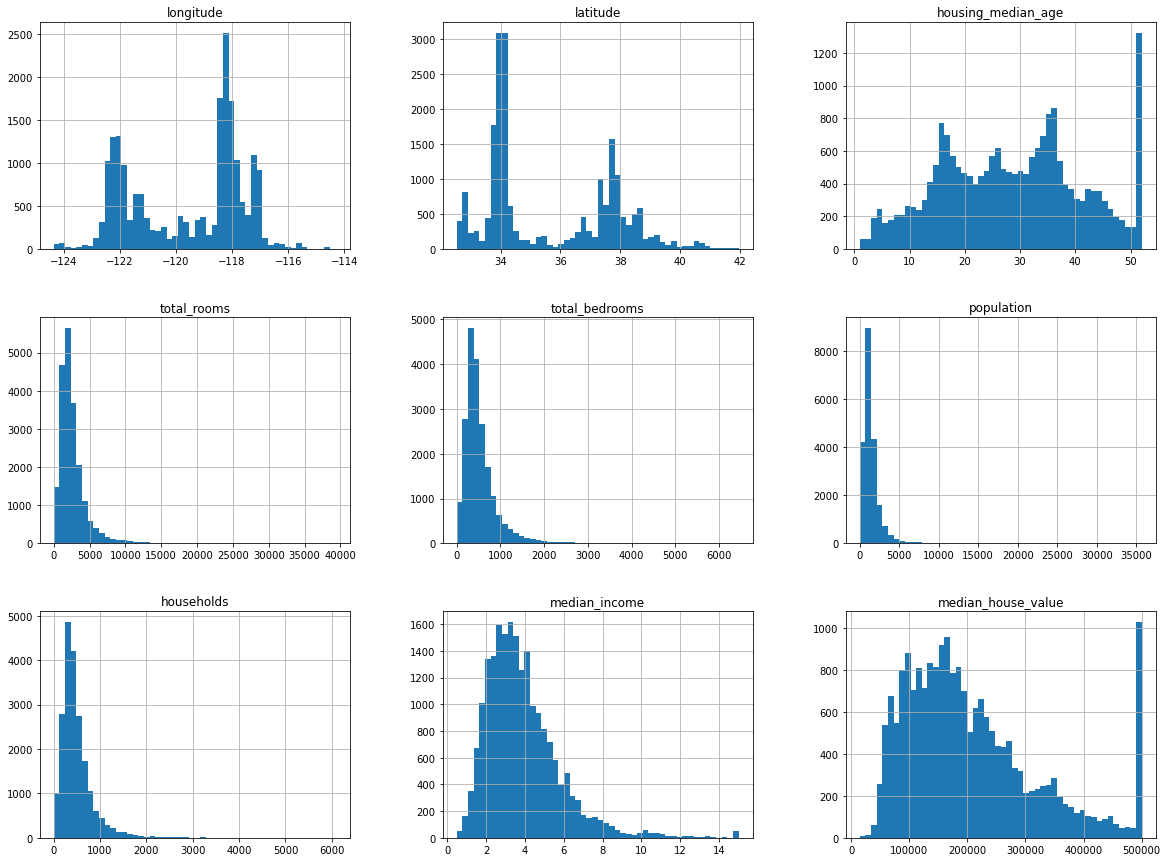

In [7]:
' Histogram plots'
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

In [8]:
' Split the dataset into train and test - naive way. Prone to sampling bias'
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.20, random_state=42)
print (train_set.shape, test_set.shape)

(16512, 10) (4128, 10)


It is important to avoid sampling bias.  In this example we're given that median income is a strong predictive feature for our targets.  Therefore, we should attempt to split the data in such a way as to preserve the proportions we see in the histogram.  To do this we'll first categorize the median incomes by some arbitrary bucketing system then apply sklearn's StratifiedShuffleSplit class.

<AxesSubplot:>

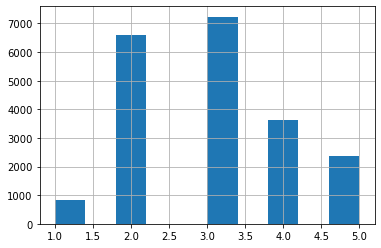

In [9]:
' Create income category attribute'
import numpy as np
housing['income_cat'] = pd.cut(
                                housing['median_income'],
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                labels=[1, 2, 3, 4, 5]
                              )

housing['income_cat'].hist()

In [10]:
' Split the data while preserving income proportions'
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
print (strat_test_set['income_cat'].value_counts() / strat_test_set.shape[0])

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


In [11]:
" Remove the income category field as it shouldn't be used as a training feature "
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [12]:
' Duplicate the train set for data exploration.  This way the training set will not be modified on accident'
housing = strat_train_set.copy()

In [13]:
' Plot the data using the geographic information. The alpha parameter is a good way to visualize density'
housing.plot(kind='scatter', x='longitude', y='latitude',alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

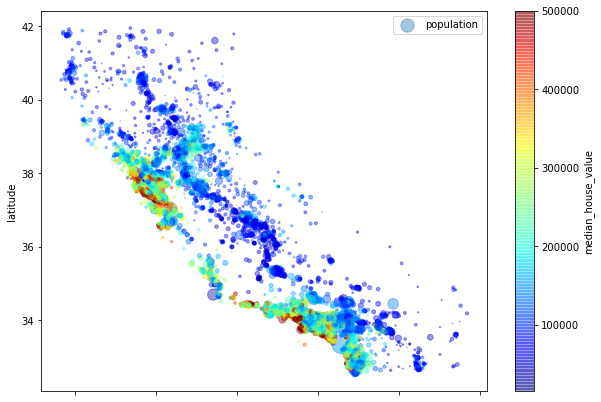

In [14]:
' Expand the usefulness of the visualization by applying point radius and point color'
housing.plot(
            kind='scatter',
            x='longitude',
            y='latitude',
            alpha=0.4,
            s=housing['population']/100,
            label='population',
            figsize=(10,7),
            c='median_house_value',
            cmap=plt.get_cmap('jet'),
            colorbar=True
            )
plt.legend()

In [15]:
' Start looking for correlations.  Begin by calculating a correlation matrix'
corr_matrix = housing.corr()

' Look at how much each attribute correlates with median house value which is the value to be predicted'
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Remember: correlations only measure linearity between the features.  Features may share non-linear relationships that are not captured with correlation coefficients

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

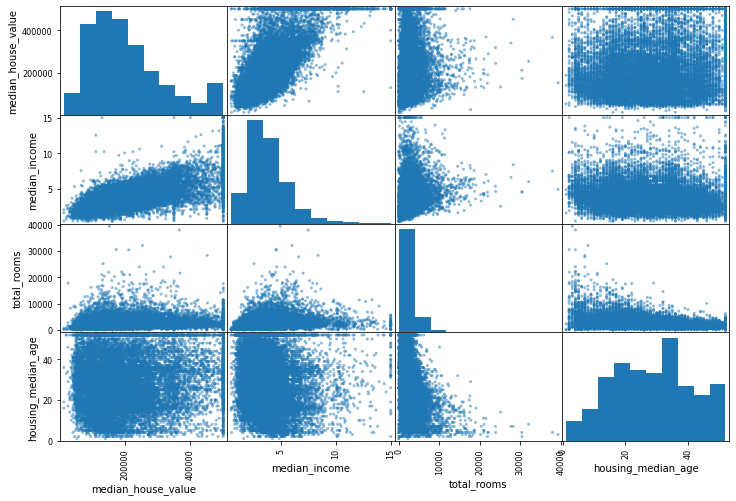

In [16]:
' Pandas offers a built in way to visualize the correlation of each feature against the other. The total plots will be features ^^ 2 so choose a few important ones for example'
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

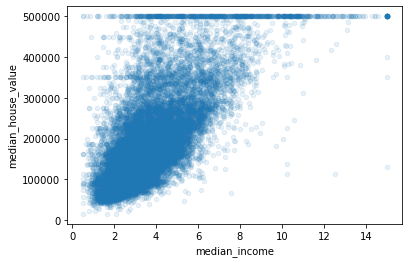

In [17]:
' Median income looks the most positively correlated of the features shown. Zoom in on it'
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

Often individual features are less valuable than combinations of features.  For example, total bedrooms per district doesn't really say much.  But total bedrooms per household is much more descriptive when trying to estimate the value of the household.  Intuitively you would expect that homes with more bedrooms will be worth more

In [18]:
housing['rooms_per_household'] = housing.total_rooms / housing.households
housing['bedrooms_per_room'] = housing.total_bedrooms / housing.total_rooms
housing['population_per_household'] = housing.population / housing.households

corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [19]:
' Practice some data cleaning techniques.  Start with a fresh copy of the dataset'
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set.median_house_value.copy()

Step 1 should always be to handle missing or error values.  These will break most ML models.  ScikitLearn offers a useful way of doing so in an organized and repeatable manner


In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

' Imputers only work on numeric data, so remove categorical data'
numeric_housing = housing.drop('ocean_proximity', axis=1)
imputer.fit(numeric_housing)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [21]:
' Simply apply the transform to the numeric data and reconstruct the DataFrame'
X = imputer.transform(numeric_housing)
housing_tr = pd.DataFrame(X, columns=numeric_housing.columns, index=numeric_housing.index)
housing_tr.info()
# No more missing values. They've been replaced with the feature median

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


Handling text features typically requires some kind of encoding.  Let's look into the ocean proximity feature

In [22]:
' Extract the categorical features.  In this case there is only one'
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN

In [23]:
' Experiment with sklearns OrdinalEncoder. This will count the number of unique attribures in the feature column and assign it a mapped integer value'
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(housing_cat)
transformed_housing_cat = ordinal_encoder.transform(housing_cat)
transformed_housing_cat[:10]
print (transformed_housing_cat[:10], '\n', ordinal_encoder.categories_)

[[0.]
 [0.]
 [4.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]] 
 [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


Ordinal Encoding works great if there is a value hierarchy within the categorical feature.  For example, a range from bad -> ok -> good would see 0 -> 1 -> 2 and in fact 2 is more superior to 0 than 1 in this case.  However, if this hierarchy does not exist within the feature then ordinal encoding will likely confuse the ML algorithm and teach it this pattern unintentionally.  To handle categorical features that do not have an embedded relationship consider using One-Hot Encoding instead.

In [24]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
one_hot_housing_cat = cat_encoder.fit_transform(housing_cat)
print (cat_encoder.categories_)
one_hot_housing_cat

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

The main issue with one-hot encoding is when there are many attributes within the feature column the end result will be thousands or millions of additional columns.  This will slow the ML algorithm down and/or introduce unnecessary confusion impacting the accuracy of the model.  In cases like this try to re-define the categorical variable as a numeric one.  In this case, replace these proximity categories with their distance from the ocean in miles or km.  You can also consider embedding which will be discussed in greater detail in CH 13 and 17.

Transforming data is critical to any ML model.  Scikitlearn is designed in such a way to be modular and customizable.  Essentially you can create your own custom transformers and apply them the same way you do any sklearn import.  Let's practice.

In [25]:
' Create a custom transformer using the sklearn architecture'
from sklearn.base import BaseEstimator, TransformerMixin
# TransformerMixin get passed into the class parameters to allow for the fit_transform() method

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

# If add_bedrooms_per_room is true you need to include that as a new column header. In practice these columns should be automated more effeciently
new_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'population_per_household']
df = pd.DataFrame(data=housing_extra_attribs, columns=new_columns, index=housing.index)
df

longitude latitude housing_median_age total_rooms total_bedrooms  \
17606   -121.89    37.29               38.0      1568.0          351.0   
18632   -121.93    37.05               14.0       679.0          108.0   
14650    -117.2    32.77               31.0      1952.0          471.0   
3230    -119.61    36.31               25.0      1847.0          371.0   
3555    -118.59    34.23               17.0      6592.0         1525.0   
...         ...      ...                ...         ...            ...   
6563    -118.13     34.2               46.0      1271.0          236.0   
12053   -117.56    33.88               40.0      1196.0          294.0   
13908    -116.4    34.09                9.0      4855.0          872.0   
11159   -118.01    33.82               31.0      1960.0          380.0   
15775   -122.45    37.77               52.0      3095.0          682.0   

      population households median_income ocean_proximity rooms_per_household  \
17606      710.0      339.0        2.7042       <1H OCEAN            4.625369   
18632      306.0      113.0        6.4214       <1H OCEAN             6.00885   
14650      936.0      462.0        2.8621      NEAR OCEAN            4.225108   
3230      1460.0      353.0        1.8839          INLAND            5.232295   
3555      4459.0     1463.0        3.0347       <1H OCEAN             4.50581   
...          ...        ...           ...             ...                 ...   
6563       573.0      210.0        4.9312          INLAND            6.052381   
12053     1052.0      258.0        2.0682          INLAND            4.635659   
13908     2098.0      765.0        3.2723          INLAND            6.346405   
11159     1356.0      356.0        4.0625       <1H OCEAN            5.505618   
15775     1269.0      639.0         3.575        NEAR BAY            4.843505   

      population_per_household  
17606                 2.094395  
18632                 2.707965  
14650                 2.025974  
3230                  4.135977  
3555                  3.047847  
...                        ...  
6563                  2.728571  
12053                 4.077519  
13908                 2.742484  
11159                 3.808989  
15775                 1.985915  

[16512 rows x 11 columns]

Probably the most important transformation for ML model is feature scaling.  There are many reasons for this.  Activation functions work better, weights aren't inflated or deflated due to feature proportions, etc.  Two of the most common scaling transfomers are MinMaxScaler which normalizes the features and StandardScaler which standardizes the featuers.  As with all transformations it is important to fit the scalers to the training data only and not the full dataset.  Only after the transformations are derived from the statistics of the training set should you apply the transformations to the test set and out-of-sample data.

Since data preprocessing requires a lot of transformations, often in a specific order, its best practice to define sklearn Pipelines which will apply all of these transformations automatically and in the desired order.

In [26]:
' Generate a Pipeline to replace null values, add custom features, and standardize the numeric values'
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    
])

housing_num_tr = num_pipeline.fit_transform(numeric_housing)
# Remember to include the TransformerMixin hyperparameter into any custom transformers.  Pipelines require the fit_transform() method to pass each transformation sequentially until the final estimator.
# The pipeline will have the methods and attributes of the final transformer.  Hence why we use fit_transform here.

' It is always better to handle the numeric and categorical transformations at the same time.  To do so, include the ColumnTransformer class to append numeric and categoric pipelines'
num_attribs = list(numeric_housing)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
    
])

housing_prepared = full_pipeline.fit_transform(housing)

Now that the data preprocessing is handled its time to try out some models.

In [27]:
' Construct a linear regression using sklearn'
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions: ', lin_reg.predict(some_data_prepared))
print('Labels: ', list(some_labels))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [28]:
' Analyze the results'
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

It seems the linear regression predicts home prices within 68,000.  That's a lot of money.  This model isn't very precise. Try another and see if the results are better

In [29]:
' Train a decision tree and analyze the results'
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Red flag.  Just assume you will never achieve 0.0 error on any real world modeling.  If something like this pops up its either overfitting or some other error in the process. To demonstrate, break up the training set to include a validation set or use cross-validation.

In [30]:
' Apply cross validation to the decision tree to better analyze the results.'
from sklearn.model_selection import cross_val_score

#Note: cross_val_score uses utility functions not loss functions so feed it the negative mse. cv is the number of folds
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [31]:
' Define a method to display the model analytics to avoid duplication of efforts'
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())
    
display_scores(tree_rmse_scores)

Scores:  [68506.02681577 68230.58483516 70397.05402947 68447.69530559
 70660.90450854 75066.98528402 72027.04735454 72189.30097381
 77578.74726092 69095.57420942]
Mean:  71219.99205772337
Standard Deviation:  2937.9375739300413


After applying the cross validation 10 times we see that the decision tree predicts home prices within 71,000.  That's even worse than the linear regression! Keep in mind that cross validation requires training the model at each fold.  If the memory and time constraint isn't bad then cross validation offers insights into how precise the model is.  When the model is time intensive it is likely best to use a validation set instead.

In [32]:
' Re-analyze the linear regressions'
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Deviation:  2731.674001798347


In [33]:
' Apply a Random Forest and analyze the results'
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_scores = np.sqrt(-scores)
display_scores(forest_scores)

Scores:  [49368.66446241 47414.18988456 49913.97724591 52557.93756795
 49802.27047507 53524.27594039 48866.55896633 48025.88290976
 53068.44836636 50000.77090388]
Mean:  50254.29767226163
Standard Deviation:  2001.1394422143862


This is the most promising of the models tested so far but missing the actual house price by 50,000 is still quite high

Its time to fine-tune the best model

In [34]:
%%time
' Apply GridSearch to optimize hyperparameters'
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},   
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

Wall time: 50.1 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
' Explore the best results'
print(grid_search.best_params_)
grid_search.best_estimator_

{'max_features': 8, 'n_estimators': 30}


RandomForestRegressor(max_features=8, n_estimators=30)

In [36]:
' Explore all results'
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63857.985315477825 {'max_features': 2, 'n_estimators': 3}
55796.671150255235 {'max_features': 2, 'n_estimators': 10}
52820.22156728309 {'max_features': 2, 'n_estimators': 30}
59774.92166270208 {'max_features': 4, 'n_estimators': 3}
52538.54693595381 {'max_features': 4, 'n_estimators': 10}
50636.26360223246 {'max_features': 4, 'n_estimators': 30}
59012.82575429179 {'max_features': 6, 'n_estimators': 3}
52086.01533885155 {'max_features': 6, 'n_estimators': 10}
50164.875570355354 {'max_features': 6, 'n_estimators': 30}
57865.89638907748 {'max_features': 8, 'n_estimators': 3}
52183.8941430912 {'max_features': 8, 'n_estimators': 10}
49982.04886164526 {'max_features': 8, 'n_estimators': 30}
63221.40284760772 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54419.21773783941 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59538.311839760376 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52615.113849381625 {'bootstrap': False, 'max_features': 3, 'n_estimators'

This isn't the only thing GridSearch can do.  You can use it to find out if an optional feature is useful or not, the best way to handle outliers, missing features, feature selection, and more.

Generally the best ways to optimize high-potential models is Cross-Validation with GridSearchCV or RandomizedSearchCV.  RandomizedSearchCV is a more generic version of GridSearchCV which will test the given parameters an arbitratily large or small amount of times depending on the users specification.  For example, a RandomSearchCV of 1000 iteration will test 1000 different values for each hyperparameter.  This gives the user a lot of freedom to explore optimization vs. computing costs.  One other valuable tool for optimzing a promising model is 'ensemble methods' which is essentially stacking the same or different models on top of one another (like a randomforest is basically many decision trees).

In [37]:
' Analyze the most important features of the best model'

# feature_importances_ is a random forest specific attribute.  https://github.com/scikit-learn/scikit-learn/blob/b194674c4/sklearn/ensemble/_forest.py#L414
# It may be available for other models, but it isn't something worth memorizing. When looking to define the most important features it's best to research what is available for the model in question.
feature_importances = grid_search.best_estimator_.feature_importances_

In [38]:
feature_importances

array([6.67652770e-02, 6.62317961e-02, 4.36964304e-02, 1.56136920e-02,
       1.44815105e-02, 1.51564103e-02, 1.42226426e-02, 3.99605565e-01,
       4.86566524e-02, 1.14138794e-01, 4.56031159e-02, 9.17817399e-03,
       1.39033027e-01, 5.07113140e-05, 3.92385388e-03, 3.64234715e-03])

In [124]:
' Its cleaner to display the importance metrics with their respective labels'
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']

# named_transformers is a ColumnTransformer() specific attribute. From sklearn: Access the fitted transformer by name.
cat_encoder = full_pipeline.named_transformers_['cat']

# categories is an attribute of OneHotEncoder() which gives "The categories of each feature determined during fitting"
cat_one_hot_attribs = list(cat_encoder.categories_[0])

# num_attribs: list of numeric column headers; extra_attribs:list of headers defined in this cell; cat_one_hot_attribs: list of categoric headers as defined in this cell
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

# zip the feature importance values with their respective header
sorted(zip(feature_importances, attributes), reverse=True)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']


[(0.3996055653889725, 'median_income'),
 (0.13903302660410605, 'INLAND'),
 (0.11413879444948724, 'pop_per_hhold'),
 (0.06676527704927679, 'longitude'),
 (0.06623179607644859, 'latitude'),
 (0.04865665242963102, 'rooms_per_hhold'),
 (0.04560311585360091, 'bedrooms_per_room'),
 (0.04369643035865989, 'housing_median_age'),
 (0.015613691983619766, 'total_rooms'),
 (0.015156410322427417, 'population'),
 (0.014481510508829898, 'total_bedrooms'),
 (0.014222642648368474, 'households'),
 (0.009178173985453687, '<1H OCEAN'),
 (0.003923853881072222, 'NEAR BAY'),
 (0.003642347146064607, 'NEAR OCEAN'),
 (5.071131398100314e-05, 'ISLAND')]

Median Income, Inland, and Population per household seem to be the most valuable features in this dataset for this RandomForest model.

Unless you want to try more experiments on feature engineering, cross-validation, model selection, etc. Its time to see how this model performs on the test set. Remember, this is a one and done.  The test set is the gold standard.  Once you cross this threshold you can't use this test set again.  Its a single use window into how the model will perform on out-of-sample data.

In [40]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

48078.235915777725


In [41]:
" Define the model's precision using a 95% confidence interval"
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, squared_errors.shape[0] - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([46064.96090229, 50010.52803777])

The final steps, if the model is selected for launch, is to determine how to host the model.  In essense you save all pipelines and the model then use the model.predict() method to generate outputs.  Selecting the correct web appliction has a lot to do with server load and desired UI.  Very likely this will be its own discussion once the model is ready for deployment.

The job isn't over though.  Frequent monitoring is necessary to avoid model rot.  Re-train the model on newer, larger datasets every now and again.  Make sure the pipelines are receiving clean data.  Comprehensive wellness checks will prevent any serious problems from arising in the future.

## Exercise 1
Try a Support Vector Machine regressor (sklearn.svm.SVR) with various hyperparameters, such as kernal='linear' (with various values for the C hyperparameter) or kernel='rbf' (with various values for the C and gamma hyperparameters).  Don't worry about what these hyperparameters mean for now.  How does the best SVR predictor perform?

In [42]:
%%time
' Use GridSearchCV to explore many different hyperparameter combinations for an SVR model. WARNING: This cell takes a very long time to run with the larger param_grid. For practical purposes shrink it'
from sklearn.svm import SVR

# Avoid using the "precomputed" kernel parameter unless the input matrix is (n x n) (square)
# param_grid = [
#     {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1., 4., 16., 32., 128.], 'gamma': ['scale', 'auto']},
# ]

param_grid = [
    {'kernel': ['linear'], 'C': [128., 512.], 'gamma': ['auto']},
]

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)
grid_search.fit(housing_prepared, housing_labels)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 2min 5s


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [128.0, 512.0], 'gamma': ['auto'],
                          'kernel': ['linear']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [43]:
# ' Analyze the results of the best model and the most relevant features'
print(
    'Best Estimator: ', grid_search.best_estimator_, '\n', 
    'Best Score: ', np.sqrt(-grid_search.best_score_), '\n', 
)

Best Estimator:  SVR(C=512.0, gamma='auto', kernel='linear') 
 Best Score:  70531.11549364598 



It doesn't seem the Support Vector Regression is better than the Random Forest.  In fact, this may be the worst model tested so far. It takes almost 2 hours to run the larger param_grid but the optimized C hyperparameter is the largest selected.  It might be possible to reduce the error but this is so much farther than the best model that it's unlikely to be worth it.

## Exercise 2
Try replacing GridSearchCV with RandomizedSearchCV

In [44]:
%%time
' The assumption being made here is to apply the following exercises to the best performing model. In this case the RandomForest'
from sklearn.model_selection import RandomizedSearchCV

forest_reg = RandomForestRegressor()
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
rsv = RandomizedSearchCV(estimator=forest_reg, param_distributions=param_grid, cv=5, verbose=1, scoring='neg_mean_squared_error', return_train_score=True,)
rsv.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 28.4 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [45]:
print (rsv.best_params_)

{'n_estimators': 30, 'max_features': 8}


In [172]:
' Analyze the results'
print('Best Estimator: ', rsv.best_estimator_, '\n') 
print('Best Score: ', np.sqrt(-rsv.best_score_), '\n'),
sorted_features = sorted(zip(rsv.best_estimator_.feature_importances_, attributes), reverse=True)
sorted_features

Best Estimator:  RandomForestRegressor(max_features=8, n_estimators=30) 

Best Score:  49995.04386646616 



[(0.3699793775265266, 'median_income'),
 (0.16126436600704988, 'INLAND'),
 (0.113804142380661, 'pop_per_hhold'),
 (0.06750287839351768, 'bedrooms_per_room'),
 (0.06633454804959046, 'longitude'),
 (0.06593974287418697, 'latitude'),
 (0.04421635151449474, 'housing_median_age'),
 (0.039183957195037776, 'rooms_per_hhold'),
 (0.015445797876726465, 'total_bedrooms'),
 (0.015443449570519293, 'population'),
 (0.015414113975208312, 'total_rooms'),
 (0.014679765040580724, 'households'),
 (0.00594631797286682, '<1H OCEAN'),
 (0.002928752200070343, 'NEAR OCEAN'),
 (0.0017886778659887998, 'NEAR BAY'),
 (0.0001277615569742209, 'ISLAND')]

The results are nearly identical to GridSearchCV but the runtime was significantly faster

## Exercise 3
Try adding a transformer in the preparation pipeline to select only the most important attributes

In [180]:
class SelectBestAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, sorted_features, n):
        self.sorted_features = sorted_features
        self.n = n
        
    def fit(self, X, y=None):
        return self
    
    def determine_attributes(self, X):
        feature_names = [x[1] for x in self.sorted_features]
        selected_features = feature_names[:self.n]
        return selected_features
    
    def transform(self, X):
        best_attributes = pd.DataFrame(X, columns=[x[1] for x in self.sorted_features])
        selected_attributes = self.determine_attributes(X)
        best_attributes = best_attributes.loc[:, selected_attributes]
        return best_attributes.values
        

## Exercise 4
Try creating a single pipeline that does the full data preparation plus the final prediction

In [181]:
comprehensive_pipeline = Pipeline([
    ('preprocessing', full_pipeline),
    ('feature_selection', SelectBestAttributes(sorted_features=sorted_features, n=8)),
    ('random_forest', RandomForestRegressor(**rsv.best_params_))
])

In [182]:
housing_prepared_with_feature_selection = comprehensive_pipeline.fit(housing, housing_labels)

In [183]:
housing_prepared_with_feature_selection.predict(housing.iloc[:5])
sorted(zip(housing_prepared_with_feature_selection.predict(housing.iloc[:5]), housing_labels.iloc[:5]), reverse=True)

[(307553.3333333333, 340600.0),
 (262323.3333333333, 286600.0),
 (240806.7, 254500.0),
 (208326.66666666666, 196900.0),
 (48176.666666666664, 46300.0)]

## Exercise 5
Automatically explore some preparation options using GridSearchCV

In [177]:
' Explore some of the pipeline parameters'
#help(RandomForestRegressor)


' Explore some of the pipeline parameters'

In [187]:
' Use GridSearchCV to test out several of the class parameters. WARNING: This cell takes a long time to run'

#  Set the OneHotEncoder's handle_unknown hyperparameter to 'ignore', to avoid warnings during training. 
#  Without this, the OneHotEncoder would default to handle_unknown='error', meaning that it would raise an error when transforming any data containing a category it didn't see during training
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preprocessing__num__imputer__strategy': ['mean', 'median', 'most_frequent', 'constant'],
    'feature_selection__n': list(range(8, len(feature_importances) + 1)),
}]

optimized_model = GridSearchCV(comprehensive_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
optimized_model.fit(housing, housing_labels)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END feature_selection__n=8, preprocessing__num__imputer__strategy=mean; total time=   2.0s
[CV] END feature_selection__n=8, preprocessing__num__imputer__strategy=mean; total time=   1.9s
[CV] END feature_selection__n=8, preprocessing__num__imputer__strategy=mean; total time=   1.9s
[CV] END feature_selection__n=8, preprocessing__num__imputer__strategy=mean; total time=   1.9s
[CV] END feature_selection__n=8, preprocessing__num__imputer__strategy=mean; total time=   1.9s
[CV] END feature_selection__n=8, preprocessing__num__imputer__strategy=median; total time=   1.9s
[CV] END feature_selection__n=8, preprocessing__num__imputer__strategy=median; total time=   1.9s
[CV] END feature_selection__n=8, preprocessing__num__imputer__strategy=median; total time=   1.9s
[CV] END feature_selection__n=8, preprocessing__num__imputer__strategy=median; total time=   1.9s
[CV] END feature_selection__n=8, preprocessing__num__imputer__stra

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
     

In [188]:
optimized_model.best_params_

{'feature_selection__n': 15,
 'preprocessing__num__imputer__strategy': 'constant'}

Chapter 2 concludes by recommending some kaggle projects before continuing on to chapter 3.  